In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

from feature_engine.transformation import PowerTransformer

In [2]:

# Load dataset
X, y = fetch_openml(name='house_prices', version=1, return_X_y=True, as_frame=True)
X.set_index('Id', inplace=True)

# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
        X, y, test_size=0.3, random_state=42
)

<Axes: xlabel='LotArea', ylabel='Count'>

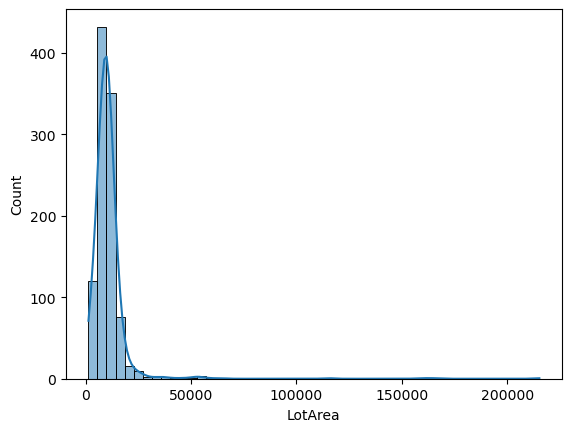

In [3]:
sns.histplot(X_train['LotArea'], kde=True, bins=50)

## Square Root Transformation

<Axes: xlabel='LotArea', ylabel='Count'>

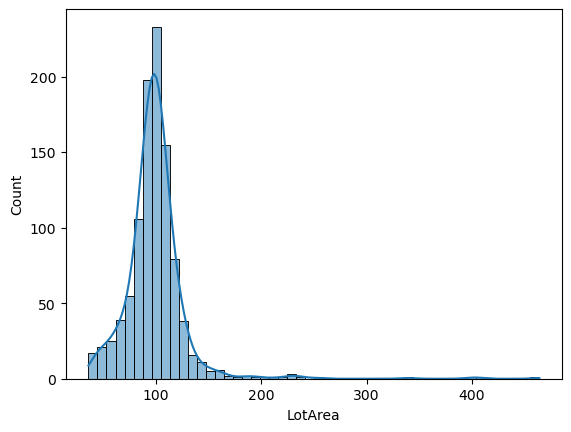

In [4]:
tf = PowerTransformer(variables=['LotArea','GrLivArea'])
X_train_transformed = tf.fit_transform(X_train)
sns.histplot(X_train_transformed['LotArea'],kde=True, bins=50)

In [5]:
tf.exp

0.5

## Exponent = 0.001

<Axes: xlabel='LotArea', ylabel='Count'>

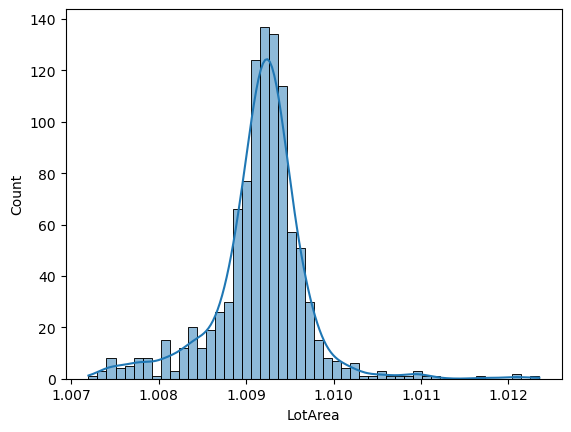

In [7]:
tf_custom = PowerTransformer(variables = ['LotArea','GrLivArea'], exp=0.001)
X_train_transformed_custom = tf_custom.fit_transform(X_train)
sns.histplot(X_train_transformed_custom['LotArea'], kde=True, bins=50)

In [8]:
tf_custom.exp

0.001

In [9]:
def compute_coefficient_of_variance(data):
    if np.mean(data)!=0:
        return np.std(data,ddof=1)/np.mean(data)
    return np.inf

In [11]:
cv_raw_data = compute_coefficient_of_variance(X_train['LotArea'])
cv_transformed = compute_coefficient_of_variance(X_train_transformed['LotArea'])
cv_transformed_custom = compute_coefficient_of_variance(X_train_transformed_custom['LotArea'])

In [12]:
print(f"""
Raw data CV: {cv_raw_data:.2%}
Transformed data exp:0.5 CV: {cv_transformed:.2%}
Transformed data exp:0.001 CV (custom): {cv_transformed_custom:.2%}
""")


Raw data CV: 105.44%
Transformed data exp:0.5 CV: 30.91%
Transformed data exp:0.001 CV (custom): 0.05%



### Choosing lambda accordingly

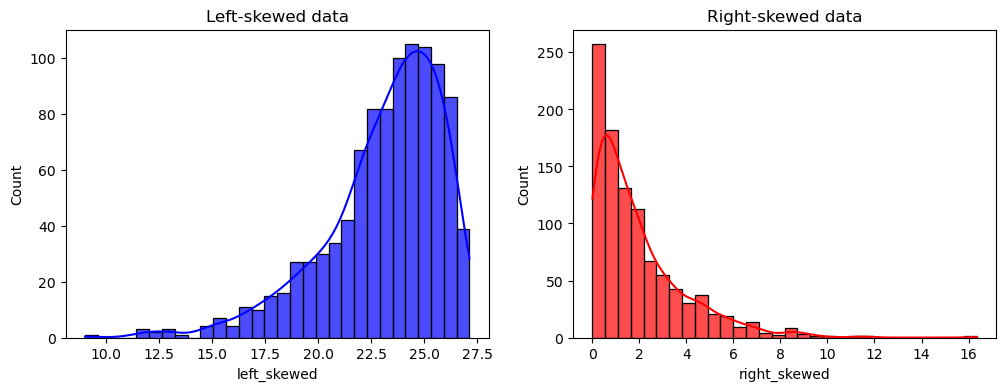

In [13]:
np.random.seed(42)

# Generating right-skewed data using exponential distribution
right_skewed_data = np.random.exponential(scale=2, size=1000)

# Generating left-skewed data by flipping the right-skewed data
left_skewed_data = -np.random.gamma(shape=2, scale=2, size=1000) \
        + np.max(np.random.gamma(shape=2, scale=2, size=1000))

# Create dataframe with simulated data
df_sim = pd.DataFrame({
        'left_skewed': left_skewed_data,
        'right_skewed': right_skewed_data}
)

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

hist_params = dict(kde=True, bins=30, alpha=0.7)
sns.histplot(df_sim.left_skewed, ax=axes[0], color='blue', **hist_params)
sns.histplot(df_sim.right_skewed, ax=axes[1], color='red', **hist_params)

axes[0].set_title('Left-skewed data')
axes[1].set_title('Right-skewed data')

plt.show()

In [14]:
tf = PowerTransformer(variables = ['left_skewed','right_skewed'])
df_sim_transformed = tf.fit_transform(df_sim)

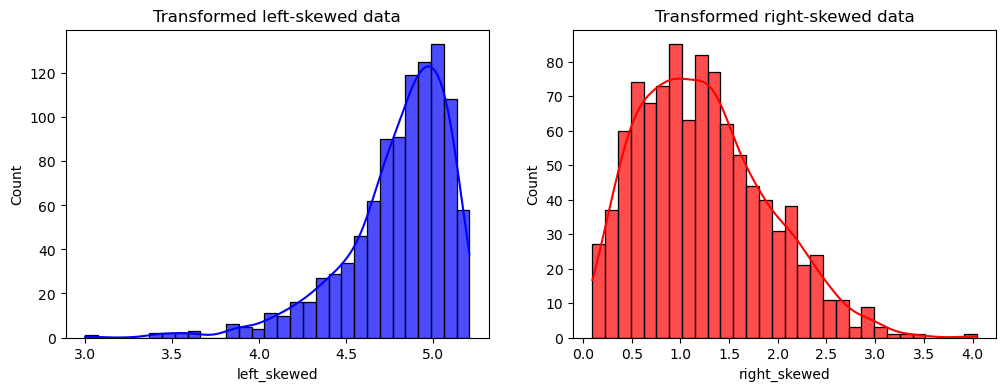

In [18]:
fig,axes = plt.subplots(ncols=2, figsize = (12,4))
sns.histplot(df_sim_transformed['left_skewed'], ax=axes[0], color='blue', **hist_params)
sns.histplot(df_sim_transformed['right_skewed'], ax=axes[1], color='red', **hist_params)

axes[0].set_title('Transformed left-skewed data')
axes[1].set_title('Transformed right-skewed data')

plt.show()

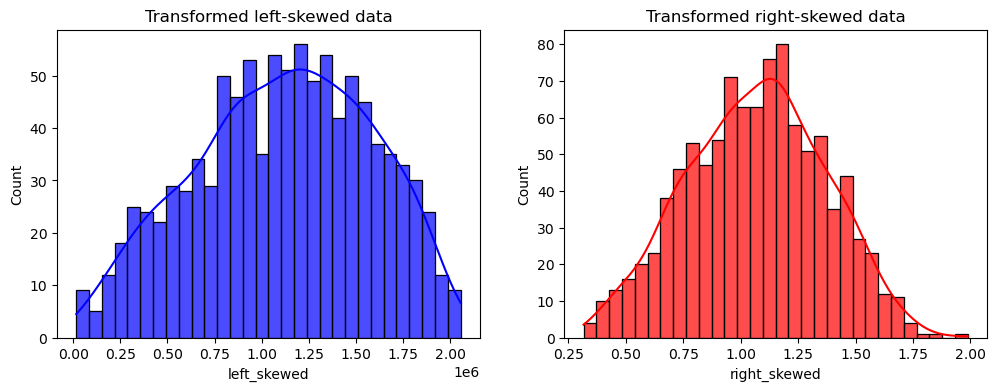

In [19]:
tf_right = PowerTransformer(variables = ['right_skewed'], exp=0.246)
tf_left = PowerTransformer(variables = ['left_skewed'], exp=4.404)

# Fit the transformers
tf_right.fit(df_sim)
tf_left.fit(df_sim)

# Plot histograms
fig,axes = plt.subplots(ncols=2, figsize=(12,4))

sns.histplot(
        tf_left.transform(df_sim)['left_skewed'], ax=axes[0],
        color='blue', **hist_params
)
sns.histplot(
        tf_right.transform(df_sim)['right_skewed'], ax=axes[1],
        color='red', **hist_params
)

axes[0].set_title('Transformed left-skewed data')
axes[1].set_title('Transformed right-skewed data')

plt.show()


In [20]:
# Set up the variable transformer (tf)
tf = PowerTransformer(variables = ['left_skewed', 'right_skewed'])

# Fit the transformer
df_sim_transformed = tf.fit_transform(df_sim)

In [ ]:
tf.inverse_transform(df_sim_transformed).head(3)

,left_skewed,right_skewed
0,23.406936,0.938536
1,26.282836,6.020243
2,22.222784,2.633491
